# <h1 align='center' >Advanced Computer Vision</h1>
<h2 align='center' >Assignment # 01</h2>
<h3 align='left' >Muhammad Farooq Khan</h3>
<h3 align='left' >Roll No: 201616</h3>
<h4>Date: 24-10-2021</h4>

In [1]:
import math
import random
import numpy as np        
from numpy import linalg as la
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Step 1: Define the intrinsic parameters and extrinsic parameters

In [2]:
au = 557.0943
av = 712.9824
u0 = 326.3819
v0 = 298.6679
f = 80
Tx = 100
Ty = 0
Tz = 1500
PhiX = 0.8*(math.pi/2)
PhiY=-1.8*(math.pi/2)
PhiX1=(math.pi/5)

## Step 2: Get the intrinsic and extrinsic transformation matrices

In [3]:
Intrinsic = [[au, 0, u0, 0],
                    [0, av, v0, 0],
                    [0, 0, 1, 0]]
print("Intrinsic Transformation Matrix: ")
print(" ")
print(np.array(Intrinsic).reshape(3,4))
arr1 = np.zeros((3,3))
RotX = [[1, 0, 0],
        [0, math.cos(PhiX),-math.sin(PhiX)],
        [0, math.sin(PhiX),  math.cos(PhiX)]]
RotY = [[math.cos(PhiY), 0, math.sin(PhiY)],
        [0 , 1, 0],
        [-math.sin(PhiY), 0, math.cos(PhiY)]]
RotX1 = [[1, 0, 0],
         [0,  math.cos(PhiX1),  -math.sin(PhiX1)],
         [0,  math.sin(PhiX1),   math.cos(PhiX1)]]
arr1 = np.dot(RotX,RotY)
Rot = np.dot(arr1,RotX1)
T = np.array([Tx,Ty,Tz]).reshape(3,1)
arr2 = np.hstack((Rot,T))
Extrinsic = np.vstack((arr2,[0,0,0,1]))
np.set_printoptions(suppress = True)
print(" ")
print("Extrinsic Transformation Matrix: ")
print(" ")
print(Extrinsic)

Intrinsic Transformation Matrix: 
 
[[557.0943   0.     326.3819   0.    ]
 [  0.     712.9824 298.6679   0.    ]
 [  0.       0.       1.       0.    ]]
 
Extrinsic Transformation Matrix: 
 
[[  -0.95105652   -0.18163563   -0.25        100.        ]
 [  -0.29389263    0.78165676    0.55012711    0.        ]
 [   0.0954915     0.59667513   -0.79678112 1500.        ]
 [   0.            0.            0.            1.        ]]


## Step 3. Define a set of 3D points in the range [-480:480;-480:480;-480:480]. Just define 6 points randomly in the 3D space.

In [4]:
Points_in_3D = np.zeros((6,3))
for i in range(0,6):
    Points_in_3D[i,0] = random.randint(-480,480)
    Points_in_3D[i,1] = random.randint(-480,480)
    Points_in_3D[i,2] = random.randint(-480,480)
arr1_3d = Points_in_3D
arr2_3d = Points_in_3D
print("Points in 3D: ")
print("")
print(Points_in_3D)  

Points in 3D: 

[[-442.  -58. -114.]
 [ 163. -459.  -67.]
 [ 155. -471.  331.]
 [ -92.   -2. -431.]
 [ 197. -350. -428.]
 [ 296. -321.  155.]]


## Step 4. Compute the projection on the image plane by using the camera transformation matrix.

In [5]:
#Transformation Matrix
Points_in_2D = np.zeros((6,3))
Transformation_Matrix = np.dot(Intrinsic,Extrinsic)  
np.set_printoptions(suppress = True)
print("Transformation Matrix using Given points:")
print("")
print(Transformation_Matrix)

#Projection
for j in range(0,6):
    arr3 = np.hstack((Points_in_3D[j],1)).reshape(4,1)
    arr4_2d = np.dot(Transformation_Matrix,arr3).reshape(1,3) 
    arr4_2d[0][0] = arr4_2d[0][0]/arr4_2d[0][2]
    arr4_2d[0][1] = arr4_2d[0][1]/arr4_2d[0][2]
    arr4_2d[0][2] = 1 
    Points_in_2D[j] = arr4_2d
    arr5_2d = Points_in_2D
    arr6_2d = Points_in_2D

print("")    
print("Projection on the image plane:")
print("")    
print(Points_in_2D) 

Transformation Matrix using Given points:

[[  -498.66146608     93.55578829   -399.32851196 545282.28      ]
 [  -181.02002332    735.51521823    154.25800499 448001.85      ]
 [     0.0954915       0.59667513     -0.79678112   1500.        ]]

Projection on the image plane:

[[532.21792526 308.95749288   1.        ]
 [345.78164925  54.4823921    1.        ]
 [300.76022799 128.42400623   1.        ]
 [416.20400414 216.36963253   1.        ]
 [354.4608179   53.83904823   1.        ]
 [252.01382423 150.20175442   1.        ]]


## Step 5. Draw the 2D points.

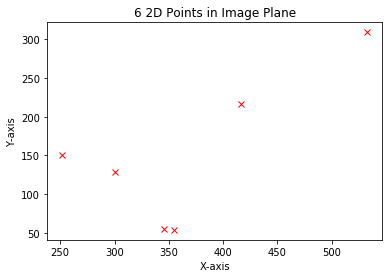

In [6]:
for i in range(0,6):
    plt.plot(Points_in_2D[i][0], Points_in_2D[i][1],marker="x", color="red")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('6 2D Points in Image Plane')
plt.show()

## Step 6. By using the points of Step 3 and their projection obtained in Step 5, compute the 3x4 transformation matrix by using the method of Hall.

In [7]:
Q_matrix = np.zeros((1,11))
arr7 = np.zeros((1,1))
Q_matrix_temp = np.zeros((2,11))
arr7_temp = np.zeros((2,1))
for i in range(0,6):
    Q_matrix_temp[0] = [Points_in_3D[i][0], Points_in_3D[i][1], Points_in_3D[i][2],
                        1, 0, 0, 0, 0, -(Points_in_3D[i][0])*(Points_in_2D[i][0]),
                        -(Points_in_3D[i][1])*(Points_in_2D[i][0]), -(Points_in_3D[i][2])*(Points_in_2D[i][0])]
    arr7_temp[0] = Points_in_2D[i][0]
    Q_matrix_temp[1] = [0, 0, 0, 0, Points_in_3D[i][0],Points_in_3D[i][1],Points_in_3D[i][2], 1,
                        -(Points_in_3D[i][0])*(Points_in_2D[i][1]), -(Points_in_3D[i][1])*(Points_in_2D[i][1]),
                        -(Points_in_3D[i][2])*(Points_in_2D[i][1])]
    arr7_temp[1] = Points_in_2D[i][1]
    Q_matrix = np.append(Q_matrix,Q_matrix_temp,axis= 0)
    arr7 = np.append(arr7,arr7_temp,axis= 0)
    
Q_matrix = np.delete(Q_matrix, (0), axis=0)
arr7 = np.delete(arr7, (0), axis=0)
Q_matrix = np.array(Q_matrix).reshape(12,11)
arr7 = np.array(arr7).reshape(12,1)
arr8 = np.dot(np.transpose(Q_matrix),Q_matrix) 
arr9 = np.linalg.inv(arr8)     
arr10 = np.dot(arr9,np.transpose(Q_matrix))
Hall_transformation = np.dot(arr10,arr7)
Hall_transformation = np.append(Hall_transformation,1).reshape((3,4))
print("Transformation matrix obtained using the method of Hall")
print("")
print(Hall_transformation)

Transformation matrix obtained using the method of Hall

[[ -0.33244098   0.06237053  -0.26621901 363.52152   ]
 [ -0.12068002   0.49034348   0.10283867 298.6679    ]
 [  0.00006366   0.00039778  -0.00053119   1.        ]]


## Step 7. Compare the matrix obtained in Step 6 to the one defined in step 2.

In [8]:
print("Transformation Matrix obtained in step 2")
print("")
print(Transformation_Matrix/1500)  #to make bottom right entry 1
print("")
print("Transformation Matrix obtained in step 6")
print("")
print(Hall_transformation)
print("")
print("Difference between Transformation Matrix obtained in step 2 and step 6 is",
      float(np.sum(np.abs(Transformation_Matrix/1500 - Hall_transformation))))

Transformation Matrix obtained in step 2

[[ -0.33244098   0.06237053  -0.26621901 363.52152   ]
 [ -0.12068002   0.49034348   0.10283867 298.6679    ]
 [  0.00006366   0.00039778  -0.00053119   1.        ]]

Transformation Matrix obtained in step 6

[[ -0.33244098   0.06237053  -0.26621901 363.52152   ]
 [ -0.12068002   0.49034348   0.10283867 298.6679    ]
 [  0.00006366   0.00039778  -0.00053119   1.        ]]

Difference between Transformation Matrix obtained in step 2 and step 6 is 4.765247894086659e-11


## Step 8. Add some Gaussian noise to all the 2D points. Repeat step 6 with the noisy 2D points and the ones defined in step 3. Compare the obtained matrix to the one you got in step 6 with the non-noisy points.

In [9]:
Pts = 6
Noise = round(95/100*Pts)
Pts_Noise = np.zeros((6,3))
for i in range (0,Noise):
        Pts_Noise[i][0]=Points_in_2D[i][0]+(np.random.rand(1)*2-1)
        Pts_Noise[i][1]=Points_in_2D[i][1]+(np.random.rand(1)*2-1)
        Pts_Noise[i][2] = 1
QNoise = np.zeros((1,11))
arr7Noise = np.zeros((1,1))
QNoise_temp = np.zeros((2,11))
arr7Noise_temp = np.zeros((2,1))
for i in range(0,6):    
    QNoise_temp[0] = [Points_in_3D[i][0], Points_in_3D[i][1], Points_in_3D[i][2], 1,
                      0, 0, 0, 0, -(Points_in_3D[i][0])*(Points_in_2D[i][0]),
                      -(Points_in_3D[i][1])*(Points_in_2D[i][0]), -(Points_in_3D[i][2])*(Points_in_2D[i][0])]
    arr7Noise_temp[0] = Pts_Noise[i][0]
    QNoise_temp[1] = [0, 0, 0, 0, Points_in_3D[i][0],Points_in_3D[i][1],Points_in_3D[i][2],
                      1, -(Points_in_3D[i][0])*(Points_in_2D[i][1]), -(Points_in_3D[i][1])*(Points_in_2D[i][1]),
                      -(Points_in_3D[i][2])*(Points_in_2D[i][1])]
    arr7Noise_temp[1] =Pts_Noise[i][1]
    QNoise = np.append(QNoise,QNoise_temp,axis= 0)
    arr7Noise = np.append(arr7Noise,arr7Noise_temp,axis= 0) 
QNoise = np.delete(QNoise, (0), axis=0)
arr7Noise = np.delete(arr7Noise, (0), axis=0)
QNoise = np.array(QNoise).reshape(12,11)
arr7Noise = np.array(arr7Noise).reshape(12,1)

arr8=np.dot(np.transpose(QNoise),QNoise) 
arr9 = np.linalg.inv(arr8)     
arr10= np.dot(arr9,np.transpose(QNoise))

Trans_Mat_Noise = np.dot(arr10,arr7Noise)
Trans_Mat_Noise = np.append(Trans_Mat_Noise,1).reshape((3,4))

Pts2DwithNoise = np.zeros((6,3))
for i in range(0,6):
    arr11 = np.hstack((Points_in_3D[i],1)).reshape(4,1)
    arr12 = np.dot(Trans_Mat_Noise,arr11).reshape(1,3)
    arr12[0][0] = arr12[0][0]/arr12[0][2]
    arr12[0][1] = arr12[0][1]/arr12[0][2]
    arr12[0][2] = 1 
    Pts2DwithNoise[i] = arr12
 
print("Transformation Matrix obtained in Step 6 \"Non Noisy\")")
print("")
print(Hall_transformation)
print("")
print("Transformation Matrix after adding Noise")
print("")
print(Trans_Mat_Noise)
print("")
print("Original 2D Points")
print("")
print(Points_in_2D)
print("")
print("2D Points after adding Noise")
print("")
print(Pts2DwithNoise)   

Transformation Matrix obtained in Step 6 "Non Noisy")

[[ -0.33244098   0.06237053  -0.26621901 363.52152   ]
 [ -0.12068002   0.49034348   0.10283867 298.6679    ]
 [  0.00006366   0.00039778  -0.00053119   1.        ]]

Transformation Matrix after adding Noise

[[ -0.31727599   0.10003555  -0.24808996 363.94368631]
 [ -0.11977927   0.48300744   0.10135723 292.34609792]
 [  0.00008065   0.00049802  -0.00048225   1.        ]]

Original 2D Points

[[532.21792526 308.95749288   1.        ]
 [345.78164925  54.4823921    1.        ]
 [300.76022799 128.42400623   1.        ]
 [416.20400414 216.36963253   1.        ]
 [354.4608179   53.83904823   1.        ]
 [252.01382423 150.20175442   1.        ]]

2D Points after adding Noise

[[531.7409488  308.66888358   1.        ]
 [346.36542574  54.26941722   1.        ]
 [300.0626222  129.11515595   1.        ]
 [416.7470671  215.69776821   1.        ]
 [355.55076879  53.73770644   1.        ]
 [252.72404851 148.94536517   1.        ]]


## Step 9. Increase the number of 3D points up to 10 points and then up to 50 points and repeat step 8.

### Defining 10 points

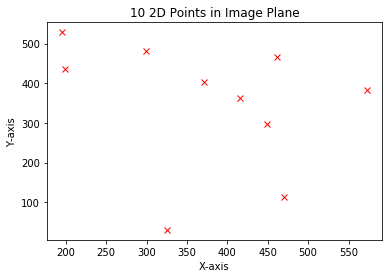

In [10]:
n = 10
Points_in_3D = np.zeros((n,3))
for i in range(0,n):
    Points_in_3D[i,0] = random.randint(-480,480)
    Points_in_3D[i,1] = random.randint(-480,480)
    Points_in_3D[i,2] = random.randint(-480,480)
Points_in_2D = np.zeros((n,3))

for i in range(0,n):
    arr11 = np.hstack((Points_in_3D[i],1)).reshape(4,1)
    arr12 = np.dot(Transformation_Matrix,arr11).reshape(1,3)
    arr12[0][0] = arr12[0][0]/arr12[0][2]
    arr12[0][1] = arr12[0][1]/arr12[0][2]
    arr12[0][2] = 1 
    Points_in_2D[i] = arr12
    
Point2D10 = Points_in_2D

for i in range(0,n):
    plt.plot(Points_in_2D[i][0], Points_in_2D[i][1],marker="x", color="red")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('10 2D Points in Image Plane')
plt.show()    

### Noisy and Non-Noisy Tranformation matrix using 10 points and comparison with previous results

In [11]:
Q_matrix = np.zeros((1,11))
arr7 = np.zeros((1,1))
Q_matrix_temp = np.zeros((2,11))
arr7_temp = np.zeros((2,1))
for i in range(0,n):
    Q_matrix_temp[0] = [Points_in_3D[i][0], Points_in_3D[i][1], Points_in_3D[i][2], 1, 0, 0, 0, 0,
                        -(Points_in_3D[i][0])*(Points_in_2D[i][0]), -(Points_in_3D[i][1])*(Points_in_2D[i][0]),
                        -(Points_in_3D[i][2])*(Points_in_2D[i][0])]
    arr7_temp[0] = Points_in_2D[i][0]
    Q_matrix_temp[1] = [0, 0, 0, 0, Points_in_3D[i][0], Points_in_3D[i][1], Points_in_3D[i][2],
                        1, -(Points_in_3D[i][0])*(Points_in_2D[i][1]), -(Points_in_3D[i][1])*(Points_in_2D[i][1]),
                        -(Points_in_3D[i][2])*(Points_in_2D[i][1])]
    arr7_temp[1] = Points_in_2D[i][1]
    Q_matrix = np.append(Q_matrix,Q_matrix_temp,axis= 0)
    arr7 = np.append(arr7,arr7_temp,axis= 0)
    
Q_matrix = np.delete(Q_matrix, (0), axis=0)
arr7 = np.delete(arr7, (0), axis=0)
Q_matrix = np.array(Q_matrix).reshape(20,11)
arr7 = np.array(arr7).reshape(20,1)
arr8 = np.dot(np.transpose(Q_matrix),Q_matrix)
arr9 = np.linalg.inv(arr8)     
arr10 = np.dot(arr9,np.transpose(Q_matrix)) 
Hall_10points = np.dot(arr10,arr7)
Hall_10points = np.append(Hall_10points,1).reshape((3,4))
Noise = round(95/100*n)
Pts_Noise = np.zeros((n,3))
for i in range (0,Noise):
        Pts_Noise[i][0] = Points_in_2D[i][0]+(np.random.rand(1)*2-1)
        Pts_Noise[i][1] = Points_in_2D[i][1]+(np.random.rand(1)*2-1)
        Pts_Noise[i][2] = 1
        
QNoise = np.zeros((1,11))
arr7Noise = np.zeros((1,1))
QNoise_temp = np.zeros((2,11))
arr7noise_temp = np.zeros((2,1))
for i in range(0,Noise):
    QNoise_temp[0] = [Points_in_3D[i][0], Points_in_3D[i][1], Points_in_3D[i][2], 1, 0, 0,
                      0, 0, -(Points_in_3D[i][0])*(Points_in_2D[i][0]), -(Points_in_3D[i][1])*(Points_in_2D[i][0]),
                      -(Points_in_3D[i][2])*(Points_in_2D[i][0])]
    
    QNoise_temp[1] = [0 , 0, 0, 0, Points_in_3D[i][0],Points_in_3D[i][1],Points_in_3D[i][2],
                      1, -(Points_in_3D[i][0])*(Points_in_2D[i][1]), -(Points_in_3D[i][1])*(Points_in_2D[i][1]),
                      -(Points_in_3D[i][2])*(Points_in_2D[i][1])]
    arr7Noise_temp[0] = Pts_Noise[i][0]
    arr7Noise_temp[1] = Pts_Noise[i][1]
    QNoise = np.append(QNoise,QNoise_temp,axis= 0)
    arr7Noise = np.append(arr7Noise,arr7Noise_temp,axis= 0) 

QNoise = np.delete(QNoise, (0), axis=0)
arr7Noise = np.delete(arr7Noise, (0), axis=0)
QNoise = np.array(QNoise).reshape(20,11)
arr7Noise = np.array(arr7Noise).reshape(20,1) 
arr8 = np.dot(np.transpose(QNoise),QNoise)
arr9 = np.linalg.inv(arr8)  
arr10 = np.dot(arr9,np.transpose(QNoise))
Hall_10points_Noise = np.dot(arr10,arr7Noise)
Hall_10points_Noise = np.append(Hall_10points_Noise,1).reshape((3,4))

print("Transformation Matrix using 6 points")
print("")
print(Transformation_Matrix/1500)
print("")
print("Transformation Matrix using 10 points")
print("")
print(Hall_10points)
print("")
print("Transformation Matrix using 10 points with Noise added")
print("")
print(Hall_10points_Noise)
print("")
print("Difference between Transformation Matrix obtained using  10 2D points and 10 2D points with Noise added is",
      float(np.sum(np.abs(Hall_10points - Hall_10points_Noise))))

Transformation Matrix using 6 points

[[ -0.33244098   0.06237053  -0.26621901 363.52152   ]
 [ -0.12068002   0.49034348   0.10283867 298.6679    ]
 [  0.00006366   0.00039778  -0.00053119   1.        ]]

Transformation Matrix using 10 points

[[ -0.33244098   0.06237053  -0.26621901 363.52152   ]
 [ -0.12068002   0.49034348   0.10283867 298.6679    ]
 [  0.00006366   0.00039778  -0.00053119   1.        ]]

Transformation Matrix using 10 points with Noise added

[[ -0.32924528   0.06233434  -0.26708341 363.39574506]
 [ -0.11765261   0.49212593   0.10092793 298.75274175]
 [  0.0000701    0.00039875  -0.00053674   1.        ]]

Difference between Transformation Matrix obtained using  10 2D points and 10 2D points with Noise added is 0.22144652320990646


### Defining 50 points

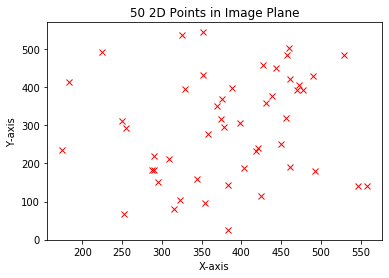

In [12]:
n = 50
Points_in_3D = np.zeros((n,3))
for i in range(0,n):
    Points_in_3D[i,0] = random.randint(-480,480)
    Points_in_3D[i,1] = random.randint(-480,480)
    Points_in_3D[i,2] = random.randint(-480,480)

Points_in_2D = np.zeros((n,3))
for i in range(0,n):
    arr11 = np.hstack((Points_in_3D[i],1)).reshape(4,1)
    arr12 = np.dot(Transformation_Matrix,arr11).reshape(1,3)
    arr12[0][0] = arr12[0][0]/arr12[0][2]
    arr12[0][1] = arr12[0][1]/arr12[0][2]
    arr12[0][2] = 1 
    Points_in_2D[i] = arr12
for i in range(0,n):
    plt.plot(Points_in_2D[i][0], Points_in_2D[i][1],marker="x", color="red")

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('50 2D Points in Image Plane')
plt.show()

### Noisy and Non-Noisy Tranformation matrix using 50 points and comparison with previous results

In [13]:
Q_matrix = np.zeros((1,11))
arr7 = np.zeros((1,1))
Q_matrix_temp = np.zeros((2,11))
arr7_temp = np.zeros((2,1))
for i in range(0,n):
    Q_matrix_temp[0] = [Points_in_3D[i][0], Points_in_3D[i][1], Points_in_3D[i][2], 1, 0, 0, 0, 0,
                        -(Points_in_3D[i][0])*(Points_in_2D[i][0]), -(Points_in_3D[i][1])*(Points_in_2D[i][0]),
                        -(Points_in_3D[i][2])*(Points_in_2D[i][0])]
    arr7_temp[0] = Points_in_2D[i][0]
    Q_matrix_temp[1] = [0, 0, 0, 0, Points_in_3D[i][0],Points_in_3D[i][1],Points_in_3D[i][2],
                        1, -(Points_in_3D[i][0])*(Points_in_2D[i][1]), -(Points_in_3D[i][1])*(Points_in_2D[i][1]),
                        -(Points_in_3D[i][2])*(Points_in_2D[i][1])]
    arr7_temp[1] = Points_in_2D[i][1]
    Q_matrix = np.append(Q_matrix,Q_matrix_temp,axis= 0)
    arr7 = np.append(arr7,arr7_temp,axis= 0)
    
Q_matrix = np.delete(Q_matrix, (0), axis=0)
arr7 = np.delete(arr7, (0), axis=0)
Q_matrix = np.array(Q_matrix).reshape(100,11)
arr7 = np.array(arr7).reshape(100,1)
arr8 = np.dot(np.transpose(Q_matrix),Q_matrix)
arr9 = np.linalg.inv(arr8)  
arr10 = np.dot(arr9,np.transpose(Q_matrix))
Hall_50points = np.dot(arr10,arr7)
Hall_50points = np.append(Hall_50points,1).reshape((3,4))
Noise = round(95/100*n)
Pts_Noise = np.zeros((n,3))
for i in range (0,Noise):
        Pts_Noise[i][0] = Points_in_2D[i][0]+(np.random.rand(1)*2-1)
        Pts_Noise[i][1] = Points_in_2D[i][1]+(np.random.rand(1)*2-1)
        Pts_Noise[i][2] = 1

QNoise = np.zeros((1,11))
arr7Noise = np.zeros((1,1))
QNoise_temp = np.zeros((2,11))
arr7Noise_temp = np.zeros((2,1))
for i in range(0,Noise):
    QNoise_temp[0] = [Points_in_3D[i][0], Points_in_3D[i][1], Points_in_3D[i][2], 1, 0, 0, 0, 0,
                      -(Points_in_3D[i][0])*(Points_in_2D[i][0]), -(Points_in_3D[i][1])*(Points_in_2D[i][0]),
                      -(Points_in_3D[i][2])*(Points_in_2D[i][0])]
    arr7Noise_temp[0] = Pts_Noise[i][0]
    QNoise_temp[1] = [0, 0, 0, 0, Points_in_3D[i][0],Points_in_3D[i][1],Points_in_3D[i][2], 1,
                      -(Points_in_3D[i][0])*(Points_in_2D[i][1]),-(Points_in_3D[i][1])*(Points_in_2D[i][1]),
                      -(Points_in_3D[i][2])*(Points_in_2D[i][1])]
    arr7Noise_temp[1] =Pts_Noise[i][1]
    QNoise = np.append(QNoise,QNoise_temp,axis= 0)
    arr7Noise = np.append(arr7Noise,arr7Noise_temp,axis= 0) 
QNoise = np.delete(QNoise, (0), axis=0)
arr7Noise = np.delete(arr7Noise, (0), axis=0)
QNoise = np.array(QNoise).reshape(96,11)
arr7Noise = np.array(arr7Noise).reshape(96,1 )
arr8 = np.dot(np.transpose(QNoise),QNoise)
arr9 = np.linalg.inv(arr8)    
arr10 = np.dot(arr9,np.transpose(QNoise)) 
Hall_50points_Noise = np.dot(arr10,arr7Noise)
Hall_50points_Noise = np.append(Hall_50points_Noise,1).reshape((3,4))

print("Transformation Matrix using 6 points")
print("       ")
print(Hall_transformation)
print("       ")
print("Transformation Matrix using 6 points with noise added")
print("       ")
print(Trans_Mat_Noise)
print("       ")
print("6 points: Difference: Without Noise - with Noise = ",
      float(np.sum(np.abs(Transformation_Matrix/1500 - Trans_Mat_Noise))))
print("       ")
print("Transformation Matrix using 10 points")
print("       ")
print(Hall_10points)
print("       ")
print("Transformation Matrix using 10 points with noise added")
print("       ")
print(Hall_10points_Noise)
print("       ")
print("10 points: Difference: Without Noise - with Noise = ",
      float(np.sum(np.abs(Hall_10points - Hall_10points_Noise))))
print("       ")
print("Transformation Matrix using 50 Points")
print("       ")
print(Hall_50points)
print("       ")
print("Transformation Matrix using 50 points with noise added")
print("       ")
print(Hall_50points_Noise)
print("       ")
print("50 points: Difference: Without Noise - with Noise = ",
      float(np.sum(np.abs(Hall_50points - Hall_50points_Noise))))

Transformation Matrix using 6 points
       
[[ -0.33244098   0.06237053  -0.26621901 363.52152   ]
 [ -0.12068002   0.49034348   0.10283867 298.6679    ]
 [  0.00006366   0.00039778  -0.00053119   1.        ]]
       
Transformation Matrix using 6 points with noise added
       
[[ -0.31727599   0.10003555  -0.24808996 363.94368631]
 [ -0.11977927   0.48300744   0.10135723 292.34609792]
 [  0.00008065   0.00049802  -0.00048225   1.        ]]
       
6 points: Difference: Without Noise - with Noise =  6.824811845132796
       
Transformation Matrix using 10 points
       
[[ -0.33244098   0.06237053  -0.26621901 363.52152   ]
 [ -0.12068002   0.49034348   0.10283867 298.6679    ]
 [  0.00006366   0.00039778  -0.00053119   1.        ]]
       
Transformation Matrix using 10 points with noise added
       
[[ -0.32924528   0.06233434  -0.26708341 363.39574506]
 [ -0.11765261   0.49212593   0.10092793 298.75274175]
 [  0.0000701    0.00039875  -0.00053674   1.        ]]
       
10 points:

## Step 10. Define the vector X of the method of Faugeras. Compute X using the points of step 3 and 4, without noise. 

In [14]:
n = 6
QFT = np.zeros((1,11))
BFT = np.zeros((1,1))
Q_temp = np.zeros((2,11))
B_temp = np.zeros((2,1))
for i in range(0,n):
    Q_temp[0] = [arr1_3d[i][0], arr1_3d[i][1], arr1_3d[i][2], -(arr1_3d[i][0])*(arr5_2d[i][0]),
                 -(arr1_3d[i][1])*(arr5_2d[i][0]), -(arr1_3d[i][2])*(arr5_2d[i][0]), 0, 0, 0, 1, 0]
    Q_temp[1] = [0 , 0, 0, -(arr1_3d[i][0])*(arr5_2d[i][1]), -(arr1_3d[i][1])*(arr5_2d[i][1]),
                 -(arr1_3d[i][2])*(arr5_2d[i][1]), arr1_3d[i][0], arr1_3d[i][1], arr1_3d[i][2], 0, 1]
    B_temp[0] =arr5_2d[i][0]
    B_temp[1] =arr5_2d[i][1]
    QFT = np.append(QFT,Q_temp,axis= 0)
    BFT = np.append(BFT,B_temp,axis= 0) 
QFT = np.delete(QFT, (0), axis=0)
BFT = np.delete(BFT, (0), axis=0)
QFT = np.array(QFT).reshape(12,11)
BFT = np.array(BFT).reshape(12,1)
arr8 = np.dot(np.transpose(QFT),QFT) 
arr9 = np.linalg.inv(arr8)     
arr10 = np.dot(arr9,np.transpose(QFT))
XFT = np.dot(arr10,BFT)
T1 = np.transpose(XFT[0:3])
T2 = np.transpose(XFT[3:6])
T3 = np.transpose(XFT[6:9])
C1 = XFT[9]
C2 = XFT[10]
u0_ft = np.dot(T1,np.transpose(T2))/((la.norm(T2)**2))
v0_ft = np.dot(T3,np.transpose(T2))/((la.norm(T2)**2))
alpha_u = la.norm(np.cross(T1,T2)/((la.norm(T2)**2)))
alpha_v = la.norm(np.cross(T2,T3)/((la.norm(T2)**2)))
TxFT = int((la.norm(T2))/(la.norm(np.cross(T1,T2)))*(C1-u0_ft))
TyFT = int((la.norm(T2))/(la.norm(np.cross(T2,T3)))*(C2-v0_ft))
TzFT = int(1/la.norm(T2))
RotxFT = ((la.norm(T2))/(la.norm(np.cross(T1,T2)))*(T1-T2*(u0_ft)))
RotyFT = ((la.norm(T2))/(la.norm(np.cross(T2,T3)))*(T3-T2*(v0_ft)))
RotzFT = T2/la.norm(T2)

print("Alpha_u = ",alpha_u)
print("Alpha_v = ",alpha_v)
print("u0 = ",u0_ft)
print("v0 = ",v0_ft)
print("Tx = ",TxFT)
print("Ty = ",TyFT)
print("Tz = ",TzFT)
print("Rotx = ",RotxFT)
print("Roty = ",RotyFT)
print("Rotz = ",RotzFT)
print("")
Intrins=[[alpha_u, 0    , u0_ft ,0,],
         [0      ,alpha_v, v0_ft  ,0],
         [0      ,0     ,        1, 0]]
Extrins=[[RotxFT[0][0], RotxFT[0][1], RotxFT[0][2],  TxFT],
             [RotyFT[0][0],  RotyFT[0][1], RotyFT[0][2],  TyFT],
             [RotzFT[0][0],  RotzFT[0][1], RotzFT[0][2],  TzFT],
             [         0,             0,           0,            1]]
Extrins=np.array(Extrins).reshape((4,4))

FT_Transformation=np.dot(Intrins,Extrins)
FT_Transformation=FT_Transformation/FT_Transformation[2,3]; 
print("Transformation Matrix obtained Using Faugerous Tasconi Method")
print("")
print(FT_Transformation)
print("")
print("Transformation Matrix obtained in step 2")
print("")
print(Transformation_Matrix/1500)
print("")
print("Difference: Faugerous - Hall = ",float(np.sum(np.abs(FT_Transformation - Transformation_Matrix/1500))))

Alpha_u =  557.0943000010009
Alpha_v =  712.9824000016404
u0 =  [[326.3819]]
v0 =  [[298.6679]]
Tx =  99
Ty =  0
Tz =  1500
Rotx =  [[-0.95105652 -0.18163563 -0.25      ]]
Roty =  [[-0.29389263  0.78165676  0.55012711]]
Rotz =  [[ 0.0954915   0.59667513 -0.79678112]]

Transformation Matrix obtained Using Faugerous Tasconi Method

[[ -0.33244098   0.06237053  -0.26621901 363.1501238 ]
 [ -0.12068002   0.49034348   0.10283867 298.6679    ]
 [  0.00006366   0.00039778  -0.00053119   1.        ]]

Transformation Matrix obtained in step 2

[[ -0.33244098   0.06237053  -0.26621901 363.52152   ]
 [ -0.12068002   0.49034348   0.10283867 298.6679    ]
 [  0.00006366   0.00039778  -0.00053119   1.        ]]

Difference: Faugerous - Hall =  0.37139620075574875


## Step 11. Add Gaussian noise to the 2D points. Compute vector X (repeat step 10) for each range.

### Add noise so that the 95% of points are in the standard deviation range [-1,1],

In [15]:
n = 6
Noise = round(95/100*n)
Pts_Noise = np.zeros((6,3))
arr5_2d = np.zeros((6,3))
for i in range (0,Noise):
        Pts_Noise[i][0] = arr6_2d[i][0]+(np.random.rand(1)*2-1)
        Pts_Noise[i][1] = arr6_2d[i][1]+(np.random.rand(1)*2-1)
        Pts_Noise[i][2] = 1
arr5_2d = Pts_Noise 
pts = 6
QFT = np.zeros((1,11))
BFT = np.zeros((1,1))
Q_temp = np.zeros((2,11))
B_Temp = np.zeros((2,1))
for i in range(0,pts):
    Q_temp[0] = [arr1_3d[i][0], arr1_3d[i][1], arr1_3d[i][2], -(arr1_3d[i][0])*(arr5_2d[i][0]),
                 -(arr1_3d[i][1])*(arr5_2d[i][0]), -(arr1_3d[i][2])*(arr5_2d[i][0]), 0, 0, 0, 1, 0]
    Q_temp[1] = [0, 0, 0, -(arr1_3d[i][0])*(arr5_2d[i][1]), -(arr1_3d[i][1])*(arr5_2d[i][1]),
                 -(arr1_3d[i][2])*(arr5_2d[i][1]), arr1_3d[i][0], arr1_3d[i][1], arr1_3d[i][2], 0, 1]
    B_Temp[0] =arr5_2d[i][0]
    B_Temp[1] =arr5_2d[i][1]
    QFT = np.append(QFT,Q_temp,axis= 0)
    BFT = np.append(BFT,B_Temp,axis= 0) 
QFT = np.delete(QFT, (0), axis=0)
BFT = np.delete(BFT, (0), axis=0)
QFT = np.array(QFT).reshape(12,11)
BFT = np.array(BFT).reshape(12,1)
arr8 = np.dot(np.transpose(QFT),QFT)
arr9 = np.linalg.inv(arr8)     
arr10 = np.dot(arr9,np.transpose(QFT))
XFT = np.dot(arr10,BFT)
T1 = np.transpose(XFT[0:3])
T2 = np.transpose(XFT[3:6])
T3 = np.transpose(XFT[6:9])
C1 = XFT[9]
C2 = XFT[10]
u0_ft = np.dot(T1,np.transpose(T2))/((la.norm(T2)**2))
v0_ft = np.dot(T3,np.transpose(T2))/((la.norm(T2)**2))
aplha_u = la.norm(np.cross(T1,T2)/((la.norm(T2)**2)))
alpha_v = la.norm(np.cross(T2,T3)/((la.norm(T2)**2)))
TxFT = int((la.norm(T2))/(la.norm(np.cross(T1,T2)))*(C1-u0_ft))
TyFT = int((la.norm(T2))/(la.norm(np.cross(T2,T3)))*(C2-v0_ft))
TzFT = int(1/la.norm(T2))
RotxFT = ((la.norm(T2))/(la.norm(np.cross(T1,T2)))*(T1-T2*(u0_ft)))
RotyFT = ((la.norm(T2))/(la.norm(np.cross(T2,T3)))*(T3-T2*(v0_ft)))
RotzFT = T2/la.norm(T2)
print("aplha_u = ",aplha_u)
print("alpha_v = ",alpha_v)
print("u0 = ",u0_ft)
print("v0 = ",v0_ft)
print("Tx = ",TxFT)
print("Ty = ",TyFT)
print("Tz = ",TzFT)
print("Rotx = ",RotxFT)
print("Roty = ",RotyFT)
print("Rotz = ",RotzFT)
Intrins = [[aplha_u, 0    , u0_ft ,0,],
             [0      ,alpha_v, v0_ft  ,0],
             [0      ,0     ,        1, 0]]
Extrins = [[RotxFT[0][0], RotxFT[0][1], RotxFT[0][2], TxFT],
             [RotyFT[0][0], RotyFT[0][1], RotyFT[0][2],  TyFT],
             [RotzFT[0][0], RotzFT[0][1], RotzFT[0][2],  TzFT],
             [         0,          0,                0,         1]]
Extrins = np.array(Extrins).reshape((4,4))
FT_Transformation = np.dot(Intrins,Extrins)
arr3_3d = arr2_3d
Points_in_2D = np.zeros((6,3))
for i in range(0,6):
    x = np.hstack((arr2_3d[i],1)).reshape(4,1)
    arr12 = np.dot(FT_Transformation,x).reshape(1,3)
    arr12[0][0]=arr12[0][0]/arr12[0][2]
    arr12[0][1]= arr12[0][1]/arr12[0][2]
    arr12[0][2]=1 
    Points_in_2D[i]=arr12
print("")
print("Transformation Matrix Obtained Using Faugerous Tasconi Method")
print("")
print(FT_Transformation/FT_Transformation[2,3])
print("")

print("Transformation Matrix Obtained in step 2")
print(Transformation_Matrix/1500)
print("")
print("Difference between transformation Matrix in step 2 and using Faugerous Tasconi method, [-1 1] noise added: ",
      float(np.sum(np.abs(Points_in_2D - Pts_Noise))))

aplha_u =  545.5692442200452
alpha_v =  693.7360698901033
u0 =  [[329.25131797]]
v0 =  [[307.56189789]]
Tx =  96
Ty =  -21
Tz =  1480
Rotx =  [[-0.95253921 -0.17783374 -0.24707126]]
Roty =  [[-0.30514607  0.768752    0.56205537]]
Rotz =  [[ 0.08999436  0.61084212 -0.78662121]]

Transformation Matrix Obtained Using Faugerous Tasconi Method

[[ -0.33111171   0.07033781  -0.2660747  364.63959327]
 [ -0.12433243   0.48728564   0.09998877 297.71834555]
 [  0.00006081   0.00041273  -0.0005315    1.        ]]

Transformation Matrix Obtained in step 2
[[ -0.33244098   0.06237053  -0.26621901 363.52152   ]
 [ -0.12068002   0.49034348   0.10283867 298.6679    ]
 [  0.00006366   0.00039778  -0.00053119   1.        ]]

Difference between transformation Matrix in step 2 and using Faugerous Tasconi method, [-1 1] noise added:  2.97967698832786


### Add noise so that the 95% of points are in the standard deviation range [-2,2],

In [16]:
n=6
Noise = round(95/100*n)

Pts_Noise = np.zeros((6,3))
arr5_2d = np.zeros((6,3))
x, y = -2, 2

for i in range (0,Noise):
        Pts_Noise[i][0]=arr6_2d[i][0]+((y - x)*np.random.rand() + x)
        Pts_Noise[i][1]=arr6_2d[i][1]+((y - x)*np.random.rand() + x)
        Pts_Noise[i][2] = 1
arr5_2d = Pts_Noise 
pts = 6
QFT = np.zeros((1,11))
BFT = np.zeros((1,1))
Q_temp = np.zeros((2,11))
B_temp = np.zeros((2,1))
for i in range(0,pts):
    Q_temp[0] = [arr1_3d[i][0], arr1_3d[i][1], arr1_3d[i][2], -(arr1_3d[i][0])*(arr5_2d[i][0]),
                 -(arr1_3d[i][1])*(arr5_2d[i][0]), -(arr1_3d[i][2])*(arr5_2d[i][0]), 0, 0, 0, 1, 0]
    Q_temp[1] = [0, 0, 0, -(arr1_3d[i][0])*(arr5_2d[i][1]), -(arr1_3d[i][1])*(arr5_2d[i][1]),
                 -(arr1_3d[i][2])*(arr5_2d[i][1]), arr1_3d[i][0], arr1_3d[i][1], arr1_3d[i][2], 0, 1]
    B_temp[0] =arr5_2d[i][0]
    B_temp[1] =arr5_2d[i][1]
    QFT = np.append(QFT,Q_temp,axis= 0)
    BFT = np.append(BFT,B_temp,axis= 0) 
QFT = np.delete(QFT, (0), axis=0)
BFT = np.delete(BFT, (0), axis=0)
QFT = np.array(QFT).reshape(12,11)
BFT = np.array(BFT).reshape(12,1)
arr8 = np.dot(np.transpose(QFT),QFT)
arr9 = np.linalg.inv(arr8)     
arr10 = np.dot(arr9,np.transpose(QFT))
XFT = np.dot(arr10,BFT)
T1 = np.transpose(XFT[0:3])
T2 = np.transpose(XFT[3:6])
T3 = np.transpose(XFT[6:9])
C1 = XFT[9]
C2 = XFT[10]
u0_ft=np.dot(T1,np.transpose(T2))/((la.norm(T2)**2))
v0_ft=np.dot(T3,np.transpose(T2))/((la.norm(T2)**2))
alpha_u = la.norm(np.cross(T1,T2)/((la.norm(T2)**2)))
alpha_v = la.norm(np.cross(T2,T3)/((la.norm(T2)**2)))
TxFT = int((la.norm(T2))/(la.norm(np.cross(T1,T2)))*(C1-u0_ft))
TyFT = int((la.norm(T2))/(la.norm(np.cross(T2,T3)))*(C2-v0_ft))
TzFT = int(1/la.norm(T2))
RotxFT = ((la.norm(T2))/(la.norm(np.cross(T1,T2)))*(T1-T2*(u0_ft)))
RotyFT = ((la.norm(T2))/(la.norm(np.cross(T2,T3)))*(T3-T2*(v0_ft)))
RotzFT = T2/la.norm(T2)
print("alpha_u = ",alpha_u)
print("alpha_v = ",alpha_v)
print("u0 = ",u0_ft)
print("v0 = ",v0_ft)
print("Tx = ",TxFT)
print("Ty = ",TyFT)
print("Tz = ",TzFT)
print("Rotx = ",RotxFT)
print("Roty = ",RotyFT)
print("Rotz = ",RotzFT)
Intrins = [[alpha_u, 0    , u0_ft ,0,],
             [0      ,alpha_v, v0_ft  ,0],
             [0      ,0     ,        1, 0]]
Extrins = [[RotxFT[0][0], RotxFT[0][1], RotxFT[0][2], TxFT],
             [RotyFT[0][0], RotyFT[0][1], RotyFT[0][2],  TyFT],
             [RotzFT[0][0], RotzFT[0][1], RotzFT[0][2],  TzFT],
             [         0,          0,          0,               1]]
Extrins = np.array(Extrins).reshape((4,4))
FT_Transformation = np.dot(Intrins,Extrins)
FT_Transformation = FT_Transformation 
arr4_3d = arr3_3d
Points_in_2D = np.zeros((6,3))
for i in range(0,6):
    x = np.hstack((arr3_3d[i],1)).reshape(4,1)
    arr12 = np.dot(FT_Transformation,x).reshape(1,3) 
    arr12[0][0] = arr12[0][0]/arr12[0][2]
    arr12[0][1] = arr12[0][1]/arr12[0][2]
    arr12[0][2] = 1 
    Points_in_2D[i]=arr12
print("")
print("Transformation Matrix Obtained Using Faugerous Tasconi Method")
print("")
print(FT_Transformation/FT_Transformation[2,3])
print("")
print("Transformation Matrix Obtained in step 2")
print("")
print(Transformation_Matrix/1500)
print("")
print("Difference between transformation Matrix in step 2 and using Faugerous Tasconi method, [-2 2] noise added: ",
      float(np.sum(np.abs(Points_in_2D - Pts_Noise))))

alpha_u =  572.6804402514354
alpha_v =  705.1647484192438
u0 =  [[313.60788317]]
v0 =  [[367.49988759]]
Tx =  140
Ty =  -160
Tz =  1567
Rotx =  [[-0.95498476 -0.14963931 -0.25614875]]
Roty =  [[-0.32808634  0.71513582  0.61720346]]
Rotz =  [[ 0.09092897  0.67424278 -0.73289058]]

Transformation Matrix Obtained Using Faugerous Tasconi Method

[[ -0.33081369   0.08025038  -0.24028822 364.77269596]
 [ -0.12631687   0.4799443    0.10586657 295.49838169]
 [  0.00005803   0.00043028  -0.0004677    1.        ]]

Transformation Matrix Obtained in step 2

[[ -0.33244098   0.06237053  -0.26621901 363.52152   ]
 [ -0.12068002   0.49034348   0.10283867 298.6679    ]
 [  0.00006366   0.00039778  -0.00053119   1.        ]]

Difference between transformation Matrix in step 2 and using Faugerous Tasconi method, [-2 2] noise added:  3.878836355708131


### Add noise so that the 95% of points are in the standard deviation range [-3,3]

In [17]:
n = 6
Noise = round(95/100*n)
Pts_Noise = np.zeros((6,3))
x, y = -3, 3
for i in range (0,Noise):
        Pts_Noise[i][0] = arr6_2d[i][0]+((y - x)*np.random.rand() + x)
        Pts_Noise[i][1] = arr6_2d[i][1]+((y - x)*np.random.rand() + x)
        Pts_Noise[i][2] = 1
arr5_2d = Pts_Noise 
pts = 6
QFT = np.zeros((1,11))
BFT = np.zeros((1,1))
Q_temp = np.zeros((2,11))
B_temp = np.zeros((2,1))
for i in range(0,pts):
    Q_temp[0] = [arr1_3d[i][0], arr1_3d[i][1], arr1_3d[i][2], -(arr1_3d[i][0])*(arr5_2d[i][0]),
                 -(arr1_3d[i][1])*(arr5_2d[i][0]), -(arr1_3d[i][2])*(arr5_2d[i][0]), 0, 0, 0, 1, 0]
    Q_temp[1] = [0, 0, 0, -(arr1_3d[i][0])*(arr5_2d[i][1]), -(arr1_3d[i][1])*(arr5_2d[i][1]),
                 -(arr1_3d[i][2])*(arr5_2d[i][1]), arr1_3d[i][0], arr1_3d[i][1], arr1_3d[i][2], 0, 1]
    B_temp[0] = arr5_2d[i][0]
    B_temp[1] = arr5_2d[i][1]
    QFT = np.append(QFT,Q_temp,axis= 0)
    BFT = np.append(BFT,B_temp,axis= 0) 
QFT = np.delete(QFT, (0), axis=0)
BFT = np.delete(BFT, (0), axis=0)
QFT = np.array(QFT).reshape(12,11)
BFT = np.array(BFT).reshape(12,1)
arr8 = np.dot(np.transpose(QFT),QFT)
arr9 = np.linalg.inv(arr8)     
arr10 = np.dot(arr9,np.transpose(QFT)) 
XFT=np.dot(arr10,BFT)
T1=np.transpose(XFT[0:3])
T2=np.transpose(XFT[3:6])
T3=np.transpose(XFT[6:9])
C1=XFT[9]
C2=XFT[10]
u0_ft=np.dot(T1,np.transpose(T2))/((la.norm(T2)**2))
v0_ft=np.dot(T3,np.transpose(T2))/((la.norm(T2)**2))
alpha_u = la.norm(np.cross(T1,T2)/((la.norm(T2)**2)))
alpha_v = la.norm(np.cross(T2,T3)/((la.norm(T2)**2)))
TxFT = int((la.norm(T2))/(la.norm(np.cross(T1,T2)))*(C1-u0_ft))
TyFT = int((la.norm(T2))/(la.norm(np.cross(T2,T3)))*(C2-v0_ft))
TzFT = int(1/la.norm(T2))
RotxFT = ((la.norm(T2))/(la.norm(np.cross(T1,T2)))*(T1-T2*(u0_ft)))
RotyFT = ((la.norm(T2))/(la.norm(np.cross(T2,T3)))*(T3-T2*(v0_ft)))
RotzFT = T2/la.norm(T2)
print("alpha_u = ",alpha_u)
print("alpha_v = ",alpha_v)
print("u0 = ",u0_ft)
print("v0 = ",v0_ft)
print("Tx = ",TxFT)
print("Ty = ",TyFT)
print("Tz = ",TzFT)
print("Rotx = ",RotxFT)
print("Roty = ",RotyFT)
print("Rotz = ",RotzFT)
Intrins = [[alpha_u, 0    , u0_ft ,0,],
             [0      ,alpha_v, v0_ft  ,0],
             [0      ,0     ,        1, 0]]
Extrins = [[RotxFT[0][0], RotxFT[0][1], RotxFT[0][2], TxFT],
             [RotyFT[0][0], RotyFT[0][1], RotyFT[0][2],  TyFT],
             [RotzFT[0][0], RotzFT[0][1], RotzFT[0][2],  TzFT],
             [         0,          0,          0,               1]]
Extrins = np.array(Extrins).reshape((4,4))
FT_Transformation = np.dot(Intrins,Extrins)
FT_Transformation = FT_Transformation
Points_in_2D = np.zeros((6,3))
for i in range(0,6):
    x = np.hstack((arr4_3d[j],1)).reshape(4,1)
    arr12 = np.dot(FT_Transformation,x).reshape(1,3)
    arr12[0][0] = arr12[0][0]/arr12[0][2]
    arr12[0][1] = arr12[0][1]/arr12[0][2]
    arr12[0][2] = 1 
    Points_in_2D[i] = arr12

print("")
print("Transformation Matrix obtained using Faugerous Tasconi Method")
print("")
print(FT_Transformation/FT_Transformation[2,3])
print("")
print("Transformation Matrix Obtained in step 2")
print("")
print(Transformation_Matrix/1500)
print("")
print("Difference between transformation Matrix in step 2 and using Faugerous Tasconi method, [-3 3] noise added: ",
           float(np.sum(np.abs(Points_in_2D - Pts_Noise))))

alpha_u =  480.99121480978687
alpha_v =  576.3539647406064
u0 =  [[287.13043796]]
v0 =  [[389.94287528]]
Tx =  215
Ty =  -227
Tz =  1355
Rotx =  [[-0.94338727 -0.11435148 -0.31135864]]
Roty =  [[-0.35080518  0.64758577  0.67643802]]
Rotz =  [[ 0.12441304  0.74817083 -0.65173753]]

Transformation Matrix obtained using Faugerous Tasconi Method

[[ -0.30851529   0.11794875  -0.24863059 363.45007721]
 [ -0.11341253   0.490762     0.10016777 293.38763543]
 [  0.00009182   0.00055216  -0.00048099   1.        ]]

Transformation Matrix Obtained in step 2

[[ -0.33244098   0.06237053  -0.26621901 363.52152   ]
 [ -0.12068002   0.49034348   0.10283867 298.6679    ]
 [  0.00006366   0.00039778  -0.00053119   1.        ]]

Difference between transformation Matrix in step 2 and using Faugerous Tasconi method, [-3 3] noise added:  1127.3658745611397
